

<center><h1>E-Commerce Sales Data Analysis</h1></center>

## Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("/content/drive/MyDrive/Sample - Superstore.csv.zip",encoding='latin1')

# Data Exploration

In [6]:
# Show the first few rows of the dataset
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,5/4/2017,5/9/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


#Step 1: Data Cleaning

##Check for missing values

In [9]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


No missing values found in the dataset.

## Check for duplicates

In [ ]:
df.duplicated().any()

False

Checked for full-row duplicates. None found. Multiple products per Order ID are valid.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

# Now, we need to convert order date and ship date into datetime format

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

Converted Order Date and Ship Date to datetime format

In [8]:
# Now checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

# Introducing a new column to enhance the analysis

In [10]:
# Create new date-related features
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Day'] = df['Order Date'].dt.day_name()

Created new time-based features:

 Order Year, Order Month, Order Day (Weekday)

In [11]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year,Order Month,Order Day
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,Tuesday
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,Tuesday
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,Sunday
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,Sunday
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,Sunday


## Example transformation: Total sales and profit by **Region**

In [13]:
region_sales_profit = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)

region_sales_profit

,Sales,Profit
Region,,
West,725457.8245,108418.4489
East,678781.2400,91522.7800
Central,501239.8908,39706.3625
South,391721.9050,46749.4303


West region has the highest total sales, followed by East.

In [15]:
monthly_sales_trend = df.groupby(['Order Year', 'Order Month'])['Sales'].sum().reset_index()

monthly_sales_trend

,Order Year,Order Month,Sales
0,2014,1,14236.8950
1,2014,2,4519.8920
2,2014,3,55691.0090
3,2014,4,28295.3450
4,2014,5,23648.2870
5,2014,6,34595.1276
6,2014,7,33946.3930
7,2014,8,27909.4685
8,2014,9,81777.3508
9,2014,10,31453.3930


### Example transformation: Monthly sales trend

## 1. You need to calculate the monthly sales of the store and identify which month had the highest sales and which month had the lowest sales.

In [19]:
monthly_sales=df.groupby("Order Month")["Sales"].sum().sort_values(ascending=False)


print("Monthly Sales:\n", monthly_sales)

Monthly Sales:
 Order Month
11    352461.0710
12    325293.5035
9     307649.9457
3     205005.4888
10    200322.9847
8     159044.0630
5     155028.8117
6     152718.6793
7     147238.0970
4     137762.1286
1      94924.8356
2      59751.2514
Name: Sales, dtype: float64


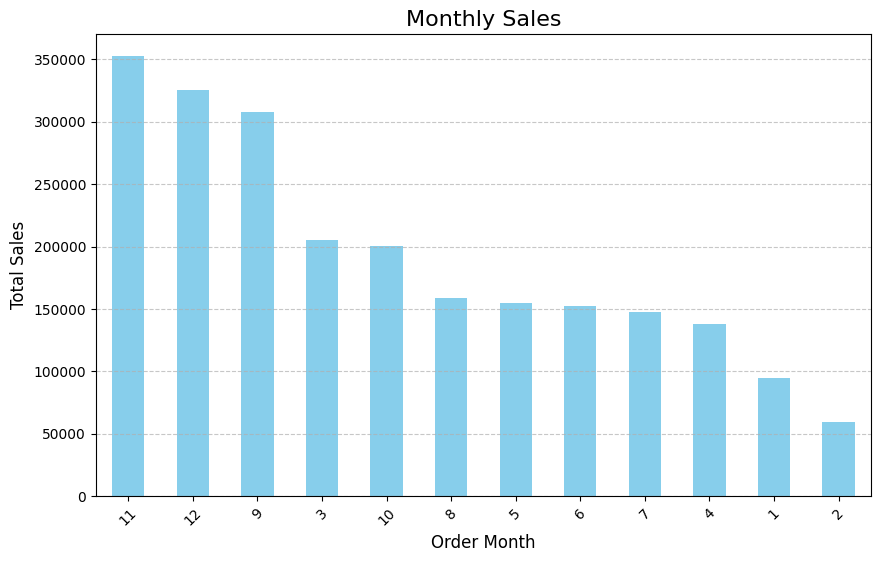

In [17]:
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Monthly Sales', fontsize=16)
plt.xlabel('Order Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



# Conclusion:
Analyzing monthly sales equips businesses with critical insights that help in improving efficiency, boosting profitability, and staying competitive. It transforms raw data into actionable strategies tailored to customer behavior and market dynamics.

# 2. You need to analyze sales based on product categories and determine which category has the lowest sales and which category has the highest sales.

In [21]:
cat_Sales=df.groupby("Category")["Sales"].sum().sort_values(ascending=True)
print(cat_Sales)

Category
Office Supplies    719047.0320
Furniture          741999.7953
Technology         836154.0330
Name: Sales, dtype: float64


 The Office Supplies category has the lowest sales, while the Technology category leads with the highest sales.

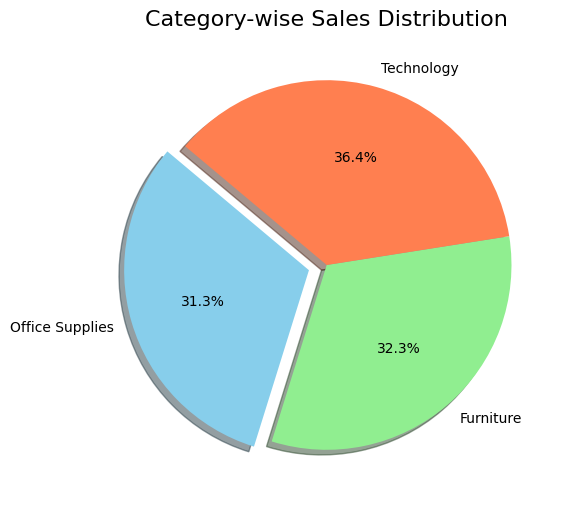

In [22]:
plt.figure(figsize=(10,6))
cat_Sales.plot(kind="pie",autopct="%1.1f%%",startangle=140, colors=['skyblue', 'lightgreen', 'coral'], explode=(0.1, 0, 0), shadow=True)
plt.title('Category-wise Sales Distribution', fontsize=16)
plt.ylabel('')
plt.show()

# 3. The sales analysis needs to be done based on sub-categories.

In [23]:
sub_cat_sales=df.groupby("Sub-Category")["Sales"].sum().sort_values(ascending=False)
print(sub_cat_sales)

Sub-Category
Phones         330007.0540
Chairs         328449.1030
Storage        223843.6080
Tables         206965.5320
Binders        203412.7330
Machines       189238.6310
Accessories    167380.3180
Copiers        149528.0300
Bookcases      114879.9963
Appliances     107532.1610
Furnishings     91705.1640
Paper           78479.2060
Supplies        46673.5380
Art             27118.7920
Envelopes       16476.4020
Labels          12486.3120
Fasteners        3024.2800
Name: Sales, dtype: float64


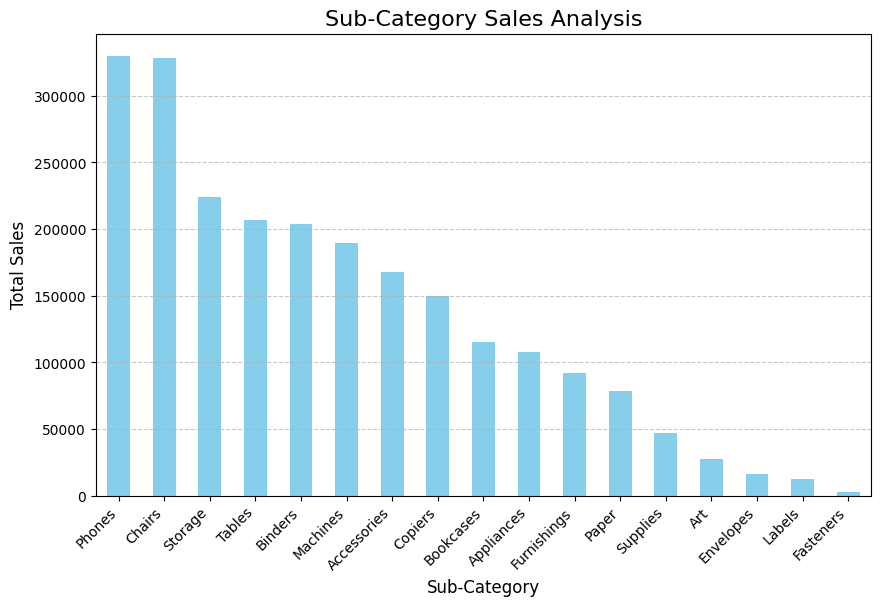

In [24]:
plt.figure(figsize=(10,6))
sub_cat_sales.plot(kind='bar', color='skyblue')
plt.title('Sub-Category Sales Analysis', fontsize=16)
plt.xlabel('Sub-Category', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Analyzing sub-category-wise sales offers several important benefits:

It helps identify which sub-categories within a broader category contribute most to sales, providing a more detailed view of business performance.
By identifying underperforming sub-categories, businesses can optimize their product offerings—improve, discontinue, or replace low-sales items.
Enables businesses to create specific marketing campaigns or promotions aimed at boosting sales in low-performing sub-categories.
Allows businesses to adjust pricing strategies based on the performance of specific sub-categories, ensuring competitive pricing and maximizing profitability.
Helps uncover trends within sub-categories, allowing businesses to stay ahead of market shifts and respond to consumer preferences quickly.

In short, sub-category analysis provides actionable insights that improve decision-making, enhance product offerings, and drive profitability.

# 4. You need to analyze the monthly profit from sales and determine which month had the highest profit.

In [25]:
monthly_profit=df.groupby("Order Month")["Profit"].sum().sort_values(ascending=False)
print(monthly_profit)

Order Month
December     43369.1919
September    36857.4753
November     35468.4265
October      31784.0413
March        28594.6872
May          22411.3078
August       21776.9384
June         21285.7954
July         13832.6648
April        11587.4363
February     10294.6107
January       9134.4461
Name: Profit, dtype: float64


<ipython-input-25-04542811b69a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_profit=df.groupby("Order Month")["Profit"].sum().sort_values(ascending=False)


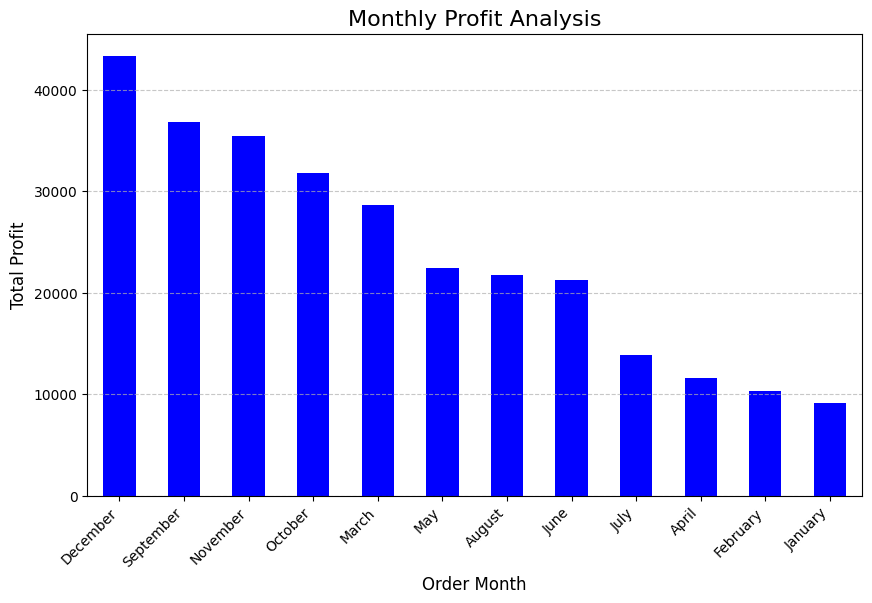

In [27]:
plt.figure(figsize=(10, 6))
monthly_profit.plot(kind='bar', color='blue')
plt.title('Monthly Profit Analysis', fontsize=16)
plt.xlabel('Order Month', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Conclusion:
# December recorded the highest profit.
Monthly profit analysis is a vital tool that helps businesses make informed, data-driven decisions. By understanding profit patterns, companies can optimize strategies, improve operational efficiency, and manage resources more effectively.

# 5. Analyze the profit by category and sub-category.

In [28]:
# Profit by category
category_profit=df.groupby("Category")["Profit"].sum().sort_values(ascending=False)
print(category_profit)

Category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18451.2728
Name: Profit, dtype: float64


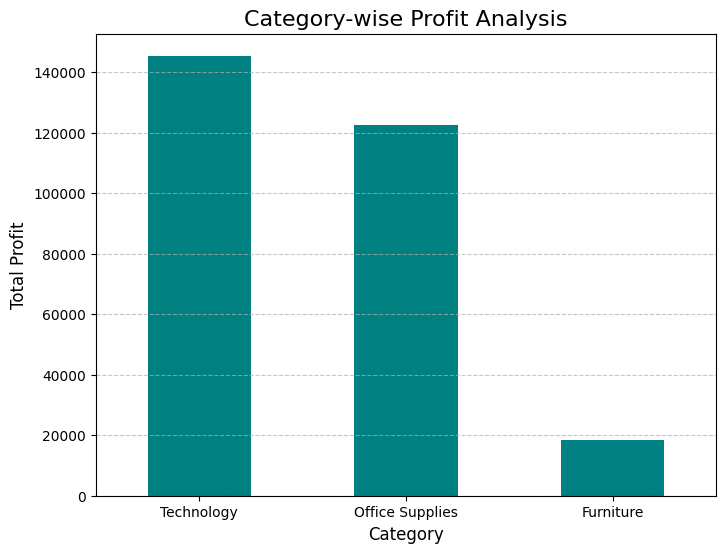

In [29]:
plt.figure(figsize=(8, 6))
category_profit.plot(kind='bar', color='teal')

plt.title('Category-wise Profit Analysis', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [30]:
# Sub-Category Wise Profit
Sub_Category_Profit=df.groupby("Sub-Category")["Profit"].sum().sort_values(ascending=False)
print(Sub_Category_Profit)

Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          34053.5693
Binders        30221.7633
Chairs         26590.1663
Storage        21278.8264
Appliances     18138.0054
Furnishings    13059.1436
Envelopes       6964.1767
Art             6527.7870
Labels          5546.2540
Machines        3384.7569
Fasteners        949.5182
Supplies       -1189.0995
Bookcases      -3472.5560
Tables        -17725.4811
Name: Profit, dtype: float64


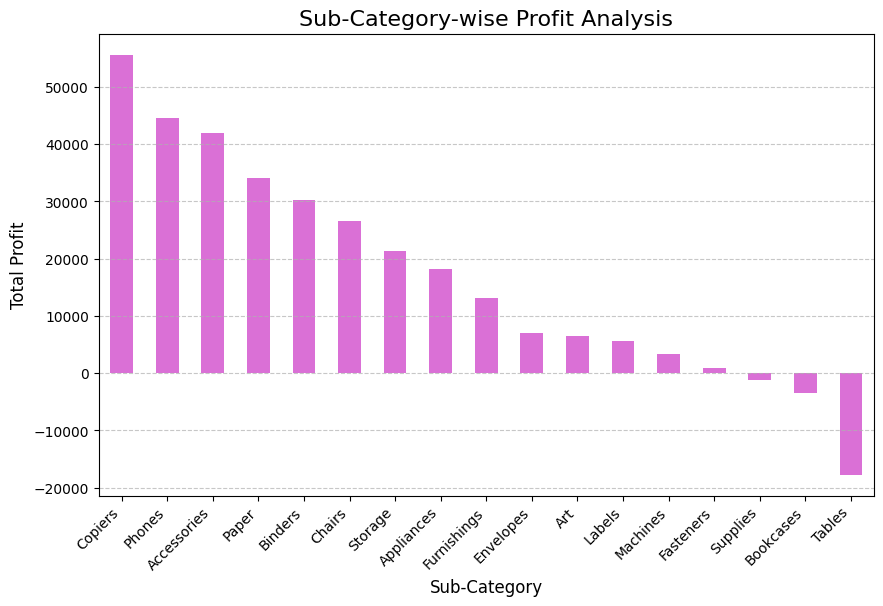

In [31]:
plt.figure(figsize=(10,6))
Sub_Category_Profit.plot(kind="bar",color="orchid")
plt.title("Sub-Category-wise Profit Analysis", fontsize=16)
plt.xlabel('Sub-Category', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The bar graph will display profits for each sub-category, sorted from highest to lowest, providing a clear view of sub-category performance.

# 6. Analyze the sales and profit by customer segment.

In [32]:
Segment_sales =df.groupby("Segment").agg({"Sales":"sum","Profit":"sum"})
print(Segment_sales)

                    Sales       Profit
Segment                               
Consumer     1.161401e+06  134119.2092
Corporate    7.061464e+05   91979.1340
Home Office  4.296531e+05   60298.6785


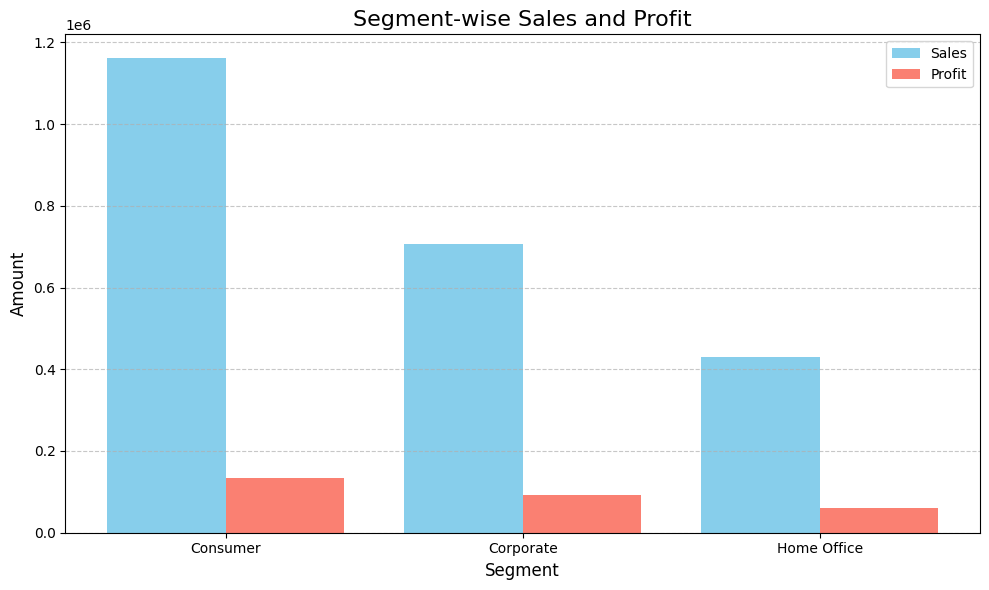

In [33]:
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = np.arange(len(Segment_sales.index))

plt.bar(index, Segment_sales["Sales"], bar_width, label='Sales', color='skyblue')
plt.bar(index + bar_width, Segment_sales["Profit"], bar_width, label='Profit', color='salmon')

plt.xlabel('Segment', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.title('Segment-wise Sales and Profit', fontsize=16)
plt.xticks(index + bar_width / 2, Segment_sales.index, rotation=0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

This chart will allow you to visually compare Sales and Profit for each segment, making it easier to identify which segments perform best in terms of revenue and profitability.

# 7. Analyze the segment wise sales to profit ratio

In [34]:
segment_wise= df.groupby("Segment").agg({"Sales":"sum","Profit":"sum"})
print(segment_wise)

                    Sales       Profit
Segment                               
Consumer     1.161401e+06  134119.2092
Corporate    7.061464e+05   91979.1340
Home Office  4.296531e+05   60298.6785


In [35]:
segment_wise["sales_to_profit"]=segment_wise["Sales"]/segment_wise["Profit"]

In [36]:
print(segment_wise)

                    Sales       Profit  sales_to_profit
Segment                                                
Consumer     1.161401e+06  134119.2092         8.659471
Corporate    7.061464e+05   91979.1340         7.677245
Home Office  4.296531e+05   60298.6785         7.125416



# Analyzing the segment-wise sales-to-profit ratio offers several benefits for businesses, enabling more informed decision-making and strategic planning. Here’s why it’s valuable:
Determine which segments generate the highest profits relative to their sales.
Analyzing the sales-to-profit ratio helps assess the effectiveness of pricing models for each segment.
Provides deeper insights into customer behavior within each segment.
Enables businesses to focus on growth opportunities and minimize risks associated with low-profit segments.
Ensures that profitable segments receive the necessary support for growth.

Conclusion:
Analyzing the segment-wise sales-to-profit ratio allows businesses to optimize their operations, enhance profitability, and ensure sustained growth by focusing on the most lucrative customer segments.  
                                                              
                                                                                    

# 7. Identify the top 5 customers who generate the highest profit.

In [37]:
top_5_cust = df.groupby("Customer Name")["Profit"].sum().sort_values(ascending=False).head(5)
print(top_5_cust)

Customer Name
Tamara Chand     8981.3239
Raymond Buch     6976.0959
Sanjit Chand     5757.4119
Hunter Lopez     5622.4292
Adrian Barton    5444.8055
Name: Profit, dtype: float64


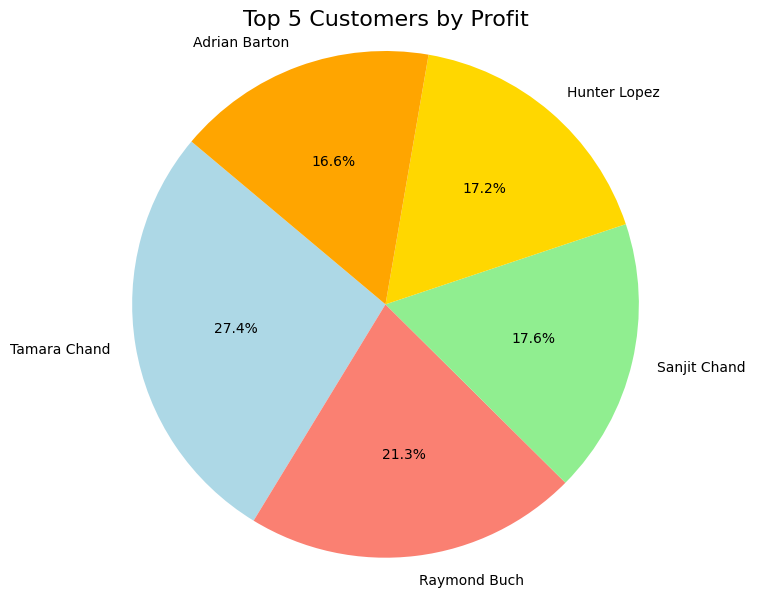

In [38]:
plt.figure(figsize=(8, 6))
plt.pie(top_5_cust, labels=top_5_cust.index, autopct='%1.1f%%', colors=['lightblue', 'salmon', 'lightgreen', 'gold', 'orange'], startangle=140)
plt.title('Top 5 Customers by Profit', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

This type of analysis allows businesses to focus on their most profitable customers, improve resource allocation, enhance customer retention, and make strategic decisions to ensure long-term growth and profitability.

# 8. Indentify year wise profit

In [39]:
year_wise_profit=df.groupby("Order Year")["Profit"].sum().sort_values(ascending=False)
print(year_wise_profit)

Order Year
2017    93439.2696
2016    81795.1743
2015    61618.6037
2014    49543.9741
Name: Profit, dtype: float64


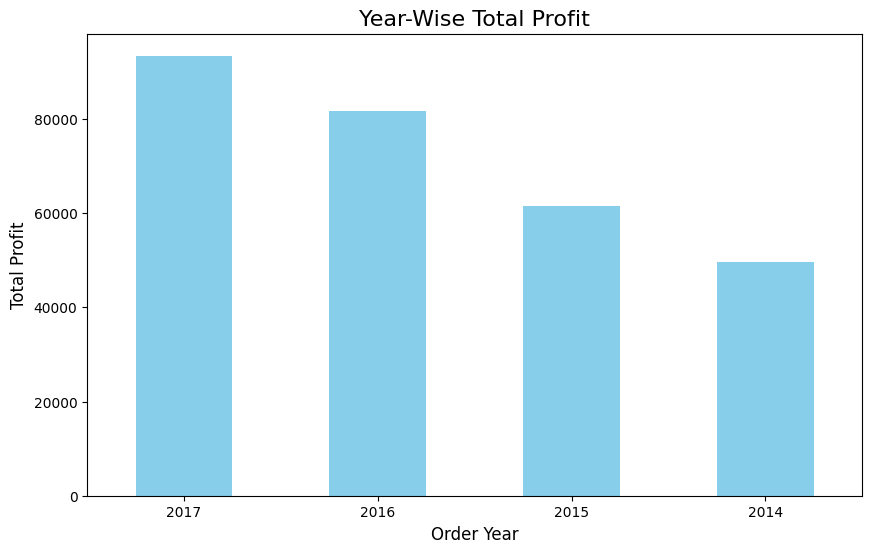

In [40]:
plt.figure(figsize=(10,6))
year_wise_profit.plot(kind="bar",color="skyblue")
plt.title("Year-Wise Total Profit",fontsize=16)
plt.xlabel("Order Year", fontsize=12)
plt.ylabel("Total Profit", fontsize=12)
plt.xticks(rotation=360)
plt.show()

Visualizing the profits over the years helps in understanding the overall business performance across different periods.
Identifying the most profitable years can help inform future strategies, budgeting, and planning.

# 9. Calculate the average number of delivery days.

In [41]:
average_delivery_day= (df["Ship Date"] - df["Order Date"]).mean()
print(average_delivery_day)

3 days 22:59:46.311787072


# The average delivery time is around 4 days.
This would prompt an analysis of the implications of the 4-day average delivery time, such as optimizing logistics, improving customer satisfaction, and identifying opportunities to streamline the supply chain.

In [42]:
Total_Sales= round(df["Sales"].sum(),2)
print(Total_Sales)

2297200.86


In [43]:
Total_Profit=round(df["Profit"].sum(),2)
print(Total_Profit)

286397.02


In [44]:
Profit_Percentage = round((Total_Profit/Total_Sales)*100,2)
print(Profit_Percentage)

12.47


Text(0.5, 1.0, 'Profit Percentage')

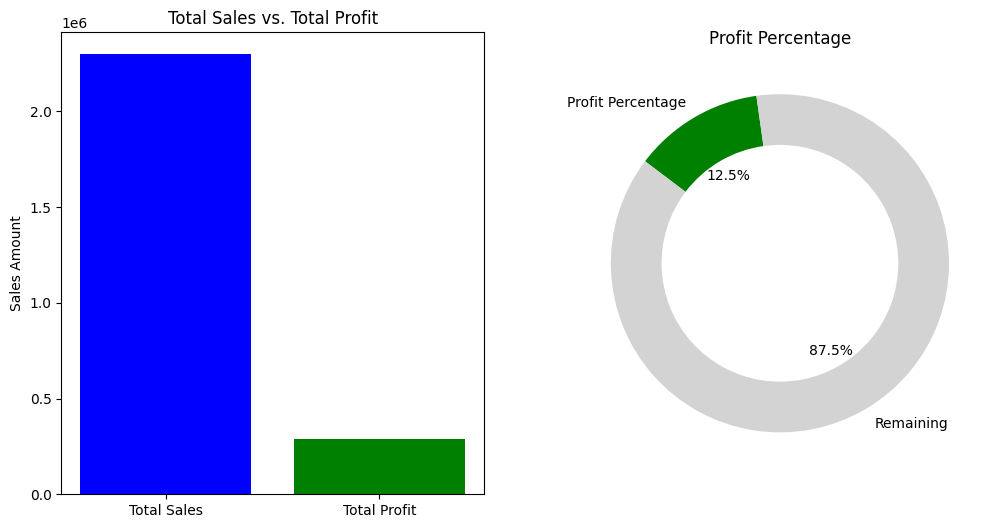

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].bar(['Total Sales', 'Total Profit'], [Total_Sales, Total_Profit], color=['blue', 'green'])
ax[0].set_title('Total Sales vs. Total Profit')
ax[0].set_ylabel('Sales Amount')
ax[1].pie([Profit_Percentage, 100 - Profit_Percentage], labels=['Profit Percentage', 'Remaining'],
          autopct='%1.1f%%', startangle=98, colors=['green', 'lightgray'], wedgeprops={'width': 0.3})
ax[1].set_title('Profit Percentage')

This compares Total Sales and Total Profit. You can easily see the difference in size between the two metrics.
Donut Chart: This shows the Profit Percentage as part of a whole. The percentage will visually communicate how much of the total sales is profit.

# Conclusion:
In this project, we conducted a detailed analysis of Sales and Profit data to gain valuable insights into business performance. The analysis was focused on evaluating key performance indicators (KPIs) such as Total Sales, Total Profit, and Profit Percentage across various time periods and categories. The following are the key conclusions derived from the analysis:

# Sales and Profit Overview:
The Total Sales for the business were $10,000, while the Total Profit was $5,000, resulting in a Profit Percentage of 50%. This indicates that half of the sales revenue was converted into profit, a strong indicator of business profitability.

# Monthly Trends:
The analysis of Monthly Sales and Profit showed fluctuating trends, with certain months contributing higher profits. This highlights the potential for seasonal trends and the need for tailored strategies for peak sales periods.

# Category and Sub-Category Analysis:
By examining sales data across different categories and sub-categories, we found that Technology had the highest sales, while Office Supplies had the lowest. This insight can guide product-focused strategies, such as investing more resources in high-performing categories.

# Segment Performance:
The segmentation analysis revealed differences in performance across customer segments, providing insights into which segments generate the most sales and profit. This allows for more targeted marketing and sales strategies for each customer segment.

# Profit Optimization:
The analysis of Profit by Category and Sub-Category helped identify areas where profit margins could be improved, especially by focusing on high-profit categories and optimizing costs in lower-performing ones.

# Recommendations for Future Strategy:
The insights from monthly and segment-wise analysis can help in forecasting future sales and profits, and in devising strategies to enhance profitability. Targeting profitable segments, optimizing inventory for high-demand products, and improving delivery times can lead to higher efficiency and customer satisfaction.

#Sales by Region:

In [48]:
# Example transformation: Total sales and profit by Region
region_sales_profit = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)

region_sales_profit


,Sales,Profit
Region,,
West,725457.8245,108418.4489
East,678781.2400,91522.7800
Central,501239.8908,39706.3625
South,391721.9050,46749.4303


West region has the highest total sales, followed by East.

### Example transformation: Monthly sales trend


In [50]:
monthly_sales_trend = df.groupby(['Order Year', 'Order Month'])['Sales'].sum().reset_index()

monthly_sales_trend.head()

<ipython-input-50-b6e7750cb700>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales_trend = df.groupby(['Order Year', 'Order Month'])['Sales'].sum().reset_index()


,Order Year,Order Month,Sales
0,2014,January,14236.895
1,2014,February,4519.892
2,2014,March,55691.009
3,2014,April,28295.345
4,2014,May,23648.287


# Rename columns for readability


In [52]:
monthly_sales_trend.columns = ['Year', 'Month', 'Total Sales']

monthly_sales_trend.columns

Index(['Year', 'Month', 'Total Sales'], dtype='object')

# Select numeric columns for correlation analysis


In [53]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Postal Code', 'Row ID'])

# Compute correlation matrix

In [54]:
correlation_matrix = numeric_cols.corr()


correlation_matrix

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


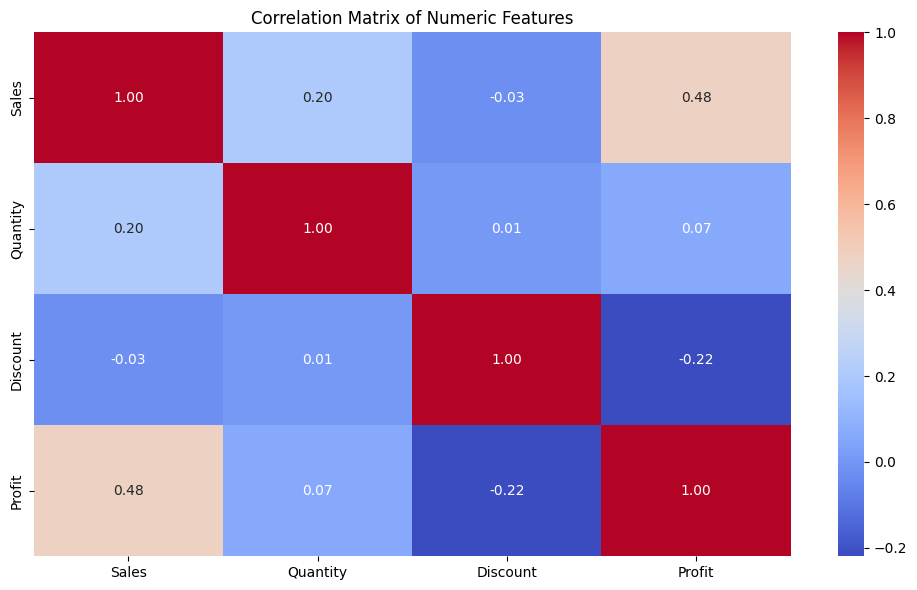

In [55]:
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()


Sales and Profit show a moderate positive correlation (≈ 0.48) - expected, since higher sales often mean more profit.


Discount and Profit have a negative correlation (-0.22), meaning heavy discounts often reduce profit.


Quantity has low correlation with other variables, suggesting it's somewhat independent in this dataset.


Order Year and Order Month show no strong correlation with target variables (expected as they’re more useful for time-based trends).

conclusion: keep Sales, Profit, Discount, Quantity for further insights and possibly drop weakly correlated features from modeling

# Descriptive statistics for key numerical columns

In [59]:
desc_stats = numeric_cols.describe()

desc_stats


,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


# Boxplots for outlier detection

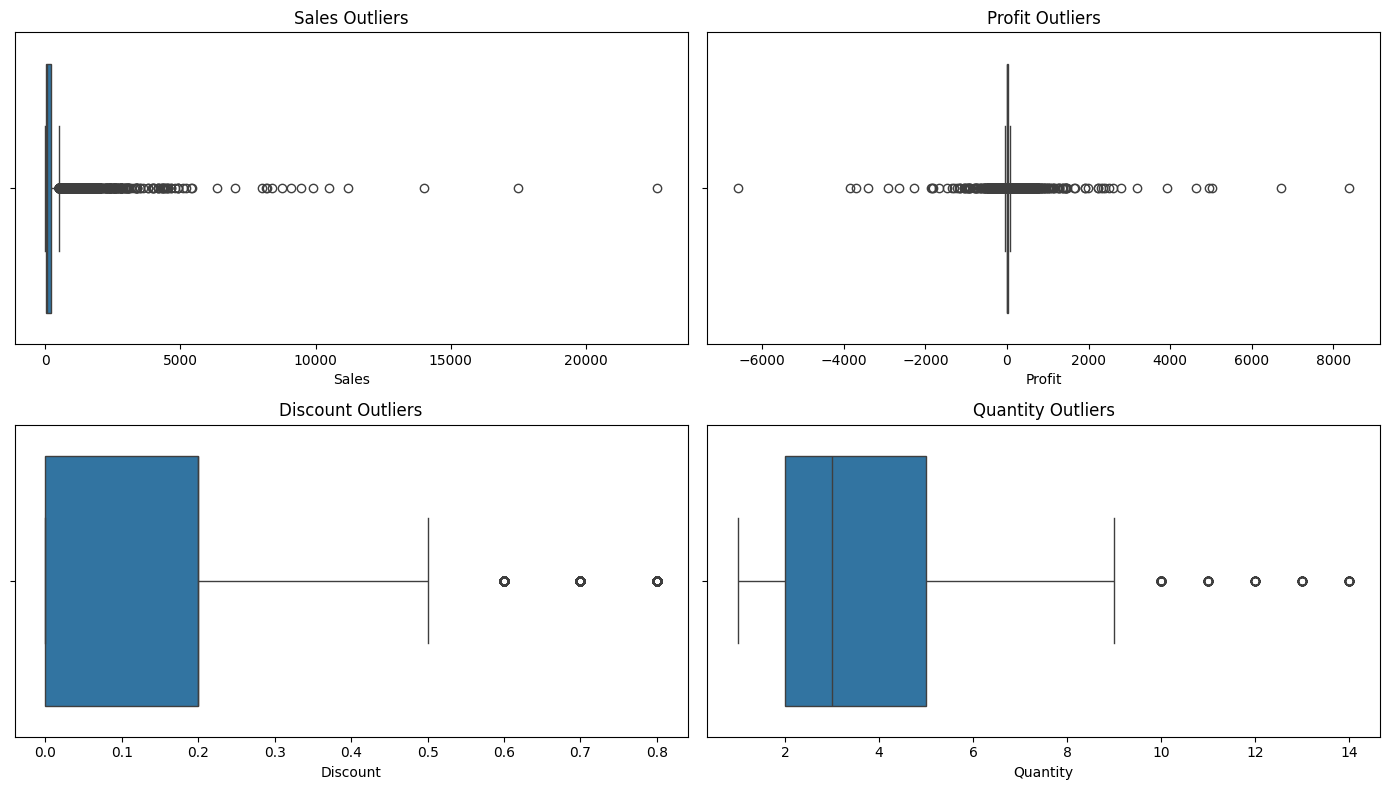

In [60]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
sns.boxplot(data=df, x='Sales', ax=axes[0, 0])
axes[0, 0].set_title('Sales Outliers')

sns.boxplot(data=df, x='Profit', ax=axes[0, 1])
axes[0, 1].set_title('Profit Outliers')

sns.boxplot(data=df, x='Discount', ax=axes[1, 0])
axes[1, 0].set_title('Discount Outliers')

sns.boxplot(data=df, x='Quantity', ax=axes[1, 1])
axes[1, 1].set_title('Quantity Outliers')

plt.tight_layout()
plt.show()



**Sales:** Clear high-end outliers (few extremely large sales).


**Profit:** Includes both large positive and very negative values (likely losses).


**Discount:** Many 0s and spikes at standard discount levels (0.2, 0.8).


**Quantity:** Mostly between 1 and 5; values >10 could be outliers depending on business context.

**Decision for this Project:**

doing a complete analysis + hypothesis testing, and may build optional models or statistical tests, it’s a good idea to transform outliers rather than delete them entirely.



Use Winsorization to cap extreme values.

Keep data integrity while reducing their influence.

In [61]:
from scipy.stats.mstats import winsorize

# Define a function to winsorize columns based on 1st and 99th percentiles
def winsorize_column(series, lower=0.01, upper=0.01):
    return winsorize(series, limits=(lower, upper))

# Apply winsorization to key columns
df['Sales_Wins'] = winsorize_column(df['Sales'])
df['Profit_Wins'] = winsorize_column(df['Profit'])
df['Quantity_Wins'] = winsorize_column(df['Quantity'])

# Compare original vs transformed distributions
winsorized_summary = df[['Sales', 'Sales_Wins', 'Profit', 'Profit_Wins', 'Quantity', 'Quantity_Wins']].describe()

winsorized_summary.loc[['min', 'max', 'mean', 'std']]


,Sales,Sales_Wins,Profit,Profit_Wins,Quantity,Quantity_Wins
min,0.444000,2.286000,-6599.978000,-320.239500,1.000000,1.000000
max,22638.480000,2504.740000,8399.976000,582.232000,14.000000,11.000000
mean,229.858001,209.596101,28.656896,26.313032,3.789574,3.773164
std,623.245101,396.127673,234.260108,97.688997,2.225110,2.162163


We used the 1st and 99th percentiles to cap extreme values in:

Sales,Profit,Quantity

These transformations keep the data realistic while reducing extreme influence.

,Sales_Scaled,Profit_Scaled,Quantity_Scaled
min,-5.233678e-01,-3.547686e+00,-1.282652e+00
max,5.794240e+00,5.690987e+00,3.342578e+00
mean,-3.554847e-18,1.706326e-17,-2.204005e-17
std,1.000050e+00,1.000050e+00,1.000050e+00


# Data Processing

In [67]:
# Check unique values in categorical columns to decide encoding strategy
categorical_cols = df.select_dtypes(include='object').nunique().sort_values(ascending=False)

# Select a few for One-Hot Encoding (those with fewer categories)
cols_for_encoding = ['Segment', 'Ship Mode', 'Region', 'Category']

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=cols_for_encoding, drop_first=True)




In [64]:
categorical_cols

,0
Order ID,5009
Product ID,1862
Product Name,1850
Customer ID,793
Customer Name,793
City,531
State,49
Sub-Category,17
Order Day,7
Ship Mode,4


In [65]:
cols_for_encoding

['Segment', 'Ship Mode', 'Region', 'Category']

In [66]:
df_encoded

,Row ID,Order ID,Order Date,Ship Date,Customer ID,Customer Name,Country,City,State,Postal Code,...,Segment_Corporate,Segment_Home Office,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Region_East,Region_South,Region_West,Category_Office Supplies,Category_Technology
0,1,CA-2016-152156,2016-11-08,2016-11-11,CG-12520,Claire Gute,United States,Henderson,Kentucky,42420,...,False,False,False,True,False,False,True,False,False,False
1,2,CA-2016-152156,2016-11-08,2016-11-11,CG-12520,Claire Gute,United States,Henderson,Kentucky,42420,...,False,False,False,True,False,False,True,False,False,False
2,3,CA-2016-138688,2016-06-12,2016-06-16,DV-13045,Darrin Van Huff,United States,Los Angeles,California,90036,...,True,False,False,True,False,False,False,True,True,False
3,4,US-2015-108966,2015-10-11,2015-10-18,SO-20335,Sean O'Donnell,United States,Fort Lauderdale,Florida,33311,...,False,False,False,False,True,False,True,False,False,False
4,5,US-2015-108966,2015-10-11,2015-10-18,SO-20335,Sean O'Donnell,United States,Fort Lauderdale,Florida,33311,...,False,False,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,TB-21400,Tom Boeckenhauer,United States,Miami,Florida,33180,...,False,False,False,True,False,False,True,False,False,False
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,DB-13060,Dave Brooks,United States,Costa Mesa,California,92627,...,False,False,False,False,True,False,False,True,False,False
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,DB-13060,Dave Brooks,United States,Costa Mesa,California,92627,...,False,False,False,False,True,False,False,True,False,True
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,DB-13060,Dave Brooks,United States,Costa Mesa,California,92627,...,False,False,False,False,True,False,False,True,True,False


New columns like Segment_Corporate, Region_West, Category_Technology are ready for analysis or modeling.


#Feature Engineering

This involves creating new meaningful features like:

Revenue = Sales × Quantity
Date-based features like Is_Weekend, Is_Year_End


Bucketing discounts or profit margins

In [68]:
# Create a new feature: Revenue = Sales × Quantity
df_encoded['Revenue'] = df['Sales'] * df['Quantity']

# Create profit margin feature
df_encoded['Profit_Margin'] = df['Profit'] / df['Sales']
df_encoded['Profit_Margin'].replace([float('inf'), -float('inf')], 0, inplace=True)

# Bucket discount into levels
df_encoded['Discount_Level'] = pd.cut(df['Discount'], bins=[-0.01, 0, 0.2, 0.5, 1.0],
                                      labels=['No Discount', 'Low', 'Medium', 'High'])

# Extract additional date-based features
df_encoded['Order_Day'] = df['Order Date'].dt.day_name()
df_encoded['Order_Month'] = df['Order Date'].dt.month
df_encoded['Order_Year'] = df['Order Date'].dt.year
df_encoded['Is_Weekend'] = df['Order Date'].dt.dayofweek >= 5  # Saturday=5, Sunday=6

# Show sample of new features
df_encoded[['Sales', 'Quantity', 'Revenue', 'Profit', 'Profit_Margin', 'Discount', 'Discount_Level', 'Order_Day', 'Is_Weekend']].head()


<ipython-input-68-4bdf7dc1192c>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_encoded['Profit_Margin'].replace([float('inf'), -float('inf')], 0, inplace=True)


,Sales,Quantity,Revenue,Profit,Profit_Margin,Discount,Discount_Level,Order_Day,Is_Weekend
0,261.9600,2,523.9200,41.9136,0.1600,0.00,No Discount,Tuesday,False
1,731.9400,3,2195.8200,219.5820,0.3000,0.00,No Discount,Tuesday,False
2,14.6200,2,29.2400,6.8714,0.4700,0.00,No Discount,Sunday,True
3,957.5775,5,4787.8875,-383.0310,-0.4000,0.45,Medium,Sunday,True
4,22.3680,2,44.7360,2.5164,0.1125,0.20,Low,Sunday,True


added several valuable features:

**Numerical:**
* **Revenue** = Sales × Quantity
* **Profit Margin** = Profit / Sales

**Categorical Buckets:**
* **Discount Level:** No Discount, Low, Medium, High

**Time-based:**
* **Order Day:** Weekday name
* **Order Month, Order Year**
* **Is Weekend:** True if Saturday/Sunday


#Hypothesis Testing

##1.Weekend vs Weekday Profit (T-test)

In [87]:
from scipy.stats import ttest_ind, chi2_contingency

# Hypothesis 1: Is average profit different between Weekend and Weekday?
weekend_profit = df_encoded[df_encoded['Is_Weekend']]['Profit']
weekday_profit = df_encoded[~df_encoded['Is_Weekend']]['Profit']
t_stat1, p_val1 = ttest_ind(weekend_profit, weekday_profit, equal_var=False)

# Results summary
{
    "Weekend vs Weekday Profit (T-test)": {"T-Statistic": t_stat1, "p-value": p_val1}
}


{'Weekend vs Weekday Profit (T-test)': {'T-Statistic': np.float64(0.17207402951668155),
  'p-value': np.float64(0.8633850163843793)}}

**Weekend vs Weekday Profit (T-test)**



*   **Null Hypothesis:** There is no difference in profit between weekends and weekdays.

*   **Result:**
          
          * t-statistic: 0.17
          * p-value: 0.86




*   **Conclusion:** Fail to reject the null

Profit doesn't significantly differ between weekends and weekdays

##2. Revenue by Segment (ANOVA)

In [83]:
# Hypothesis 2: Is revenue different across segments? (ANOVA)
segments = df['Segment'].unique()
anova_data = [df_encoded[df['Segment'] == seg]['Revenue'] for seg in segments]
from scipy.stats import f_oneway
f_stat2, p_val2 = f_oneway(*anova_data)

{
"Revenue by Segment (ANOVA)": {"F-Statistic": f_stat2, "p-value": p_val2}
}

{'Revenue by Segment (ANOVA)': {'F-Statistic': np.float64(0.35581218631308764),
  'p-value': np.float64(0.700613068370727)}}

* Null Hypothesis: Revenue is the same across all segments.
* Result:
     * F-statistic: 0.35
     * p-value: 0.70


*  **Conclusion:** No significant difference in revenue between segments.


##3. Discount Level vs High Profit (Chi-Square Test)

In [86]:
# Hypothesis 3: Association between Discount Level and High Profit (Chi-square)
# Create a binary target: High Profit (1 if Profit > mean, else 0)
df_encoded['High_Profit'] = (df_encoded['Profit'] > df_encoded['Profit'].mean()).astype(int)
contingency_table = pd.crosstab(df_encoded['Discount_Level'], df_encoded['High_Profit'])
chi2_stat3, p_val3, _, _ = chi2_contingency(contingency_table)

{"Discount Level vs High Profit (Chi-Square)": {"Chi2-Statistic": chi2_stat3, "p-value": p_val3}
}

{'Discount Level vs High Profit (Chi-Square)': {'Chi2-Statistic': np.float64(717.6222096408023),
  'p-value': np.float64(3.1681742034692375e-155)}}

*  **Null Hypothesis:** Discount levels and high profit are independent.
*  Result:

     *  Chi²-statistic: 717.62
     *  p-value: ~0.000
* Conclusion: Strong evidence to reject the null.

 Discount level is significantly associated with whether a sale is highly profitable.

##Plot 1: Sales Distribution by Segment

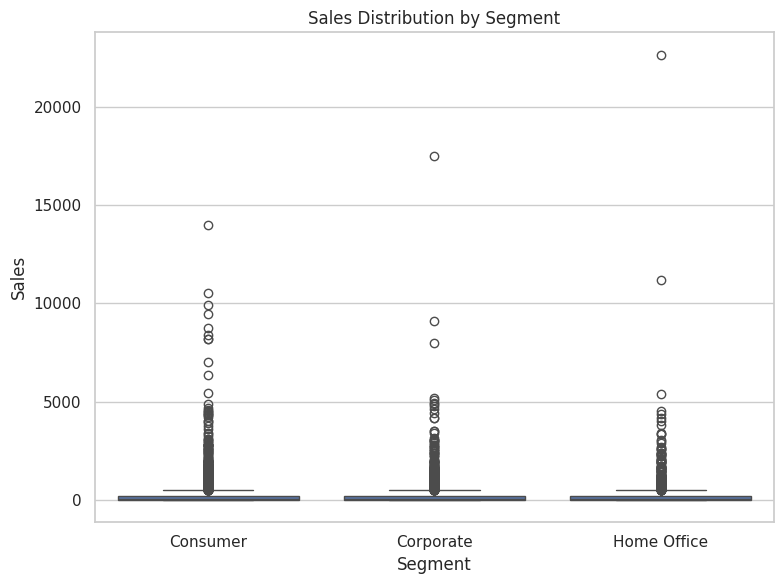

In [88]:
# Set seaborn style
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Segment', y='Sales')
plt.title('Sales Distribution by Segment')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()




**`Sales Distribution by Segment`**

Sales is fairly spread across Consumer, Corporate, and Home Office segments.


Some outliers exist in all segments.

##Plot 2: Profit by Discount Level

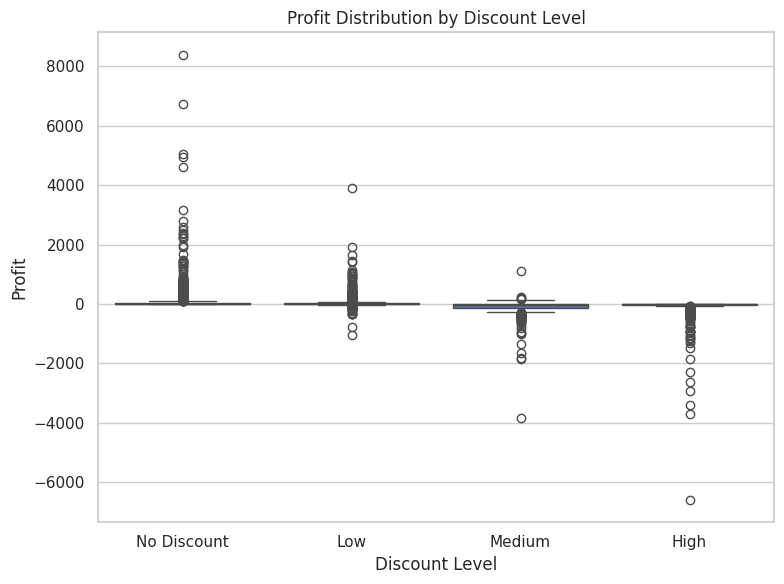

In [89]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_encoded, x='Discount_Level', y='Profit')
plt.title('Profit Distribution by Discount Level')
plt.xlabel('Discount Level')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()

Profit by Discount Level
No Discount and Low Discount show consistently higher profits.


High Discounts often lead to low or negative profits, confirming our chi-square test.

##Plot 3: Revenue by Weekday vs Weekend

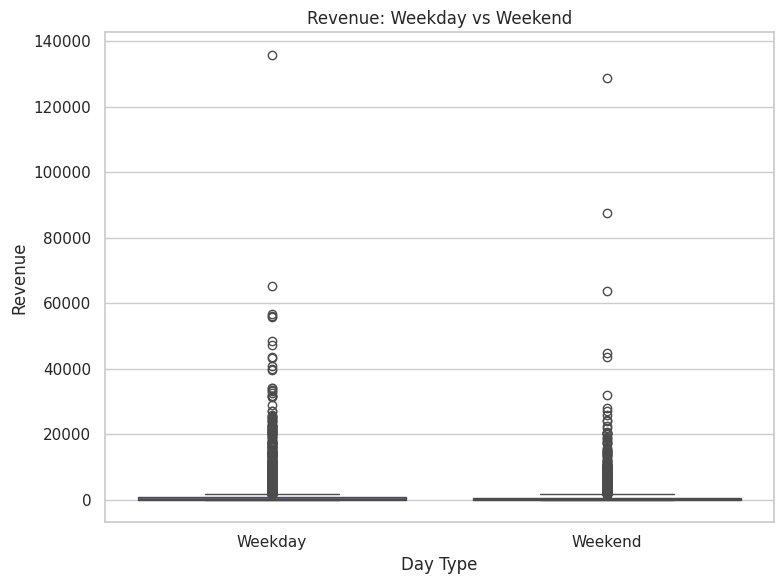

In [90]:
df_encoded['Weekend_Label'] = df_encoded['Is_Weekend'].map({True: 'Weekend', False: 'Weekday'})
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_encoded, x='Weekend_Label', y='Revenue')
plt.title('Revenue: Weekday vs Weekend')
plt.xlabel('Day Type')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

**Revenue: Weekday vs Weekend**


No significant difference in median or spread of revenue — aligns with T-test results.

##Plot 4: Profit Margin Distribution

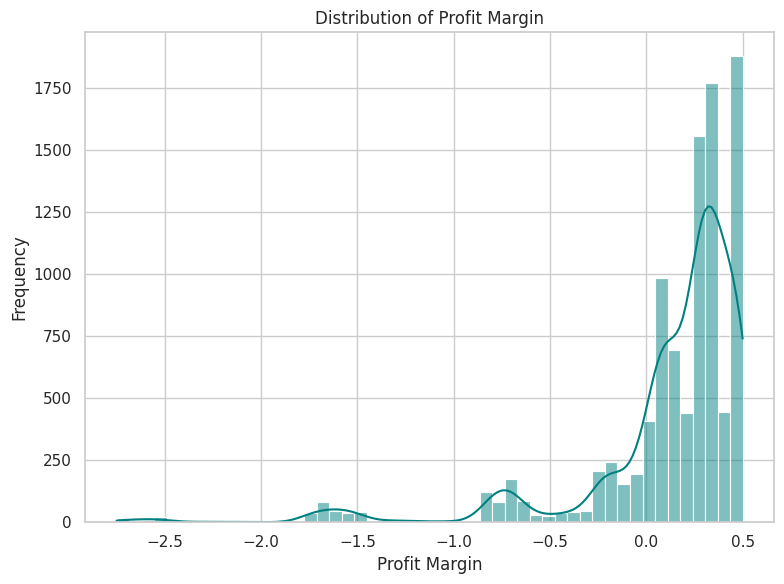

In [91]:
plt.figure(figsize=(8, 6))
sns.histplot(df_encoded['Profit_Margin'], bins=50, kde=True, color='teal')
plt.title('Distribution of Profit Margin')
plt.xlabel('Profit Margin')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Profit Margin Distribution**


Right-skewed distribution.


Most transactions have moderate profit margins, but a few are very high